# Import standard libraries

These are the most common libraries to load in basically any project dealing with financial data

* **NumPy** - A fundamental package for scientific computing in Python, provides a multidimensional array object and several routines for fast operations on them. Read the [documentation](https://numpy.org/doc/stable/) for more information.

*  **Pandas** -  Another fundamental library providing high-performance, easy-to-use data structures and data analysis tools for Python. Is almost a must for any Python program dealing with data. Read the [documentation](https://pandas.pydata.org/docs/) for more information.

* **Yfinance** - Offers a threaded and Pythonic way to download market data from Yahoo! finance. Read the [documentation](https://pypi.org/project/yfinance/) for more information.

* **Matplotlib** - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Read the [documentation](https://matplotlib.org/stable/users/index) for more information.



In [ ]:
!pip install yfinance==0.2.54

In [ ]:
#Standard packages
import numpy as np
import pandas as pd

#Dates
from datetime import datetime

#Finance packages
import yfinance as yf

#Plotting packages
import matplotlib.pyplot as plt

## Settings for nice figures
from matplotlib import rcParams

rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 30
rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16
rcParams["figure.figsize"] = (8,6)

# Downloading financial data

We can use the yfinance package to download data from yahoo finance (https://es.finance.yahoo.com/). We have to select the start and end dates to define the period in which we want to obtain the data as well as the asset (or assets) we want to track. The output is a **pandas dataframe**, which in essence is a spreadsheet like the ones used in excel. In this course, we will extensively work with dataframes, so it is important to get accustomed to manipulating them.

*Terminology alert: a single column of a dataframe is called a pandas Series. It is not equal to a list or to an array, because a Series keeps the indices of the entries (we will see what indices are in a few moments)*.


In [ ]:
########## DO NOT CHANGE THESE PARAMETERS ##########

start = datetime(2013, 1, 1) #We can use datetime format
end = '2014-01-01' # Also works in string format
interval = "1d" #Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo. Default is 1 day
assets = "TSLA" #Multiple assets can be also downloaded by using list format: ["AAPL", "MSFT", "AMZN",  "TSLA", "GOOGL",  "GOOG", "UNH", "NVDA", "JNJ", "META"]

###################################################

df = yf.download(assets, start=start, end=end, interval=interval, progress=True)


[*********************100%***********************]  1 of 1 completed


# Playing with dataframes



Once we have a dataframe, the first step is usually to get to know it. There are several ways to do this:
* df.info() returns a summary of the internal structure of the dataframe.
* df.describe() returns a summary of descriptive statistics of each column, like number of entries (count), average (mean), standard deviation (std), quartiles (25%, 50%, 75%)...
* df.head(n) and df.tail(n) returns the first the first/last n rows of the dataframe.

In [ ]:
### Play with the dataframe here to get a feeling of its structure and contents.



There are a few things that stand out. First, even though we have selected a period of 1 year in daily resolution, only **252** values have been downloaded. This is because yfinance excludes days where the stock market is closed (weekends and holidays). That leaves 252 work days per year. Second, the rows of the dataframe are days, and the columns are different variables that are recorded daily. These are:

* **Open:** Cash value of the first transacted price after the market opens.

* **High** Maximum cash value of the transactions occured between the opening and closing of the market.

* **Low:** Minimum cash value of the transactions occurred between the opening and closing of the market.

* **Close:** Cash value of the last transacted price before the market closes.

* **Volume:** Number of transactions processed between the opening and closing of the market.

In this course, we will focus on the close value.

**WARNING**: older versions of yfinance provided an additional column called Adj Close, which adjusts the close values to dividends and stock splits. If you see Adj. Close in your dataframe, use that one! Here we use Close because now yfinance adjusts all values automatically by default.

## Extracting info from a dataframe

Usually, dataframes contain huge amounts of information, most of which we don't want. Therefore, we need to know how to extract useful information from dataframes. First, we will see the commands used to extract a whole column and a whole row.

*Terminology alert: the symbol that identifies each row of a dataframe (in our case, the date) is called an index*.
* **Extract a single column**: df["Column_name"]
* **Extract multiple columns**: df[["Column_name_1","Column_name_2"]] (notice the double brackets, the first bracket is to tell pandas that we want columns, while the second is because we are providing a list of strings, and python lists are denoted by brackets).
*  **Extract a single row**: we have two options: df.loc[row_label] uses the name of the label, and df.iloc[row_position] uses its position in the dataframe.
* **Simultaneously extract rows and columns**: df.iloc[0:1][["Column_name_1", "Column_name_2"]].<br>
- **WARNING**: It is easy to get errors with iloc: <br>
✅ df.loc[0:1, ["Column_name_1", "Column_name_2"]] → Preferred <br>
✅ df.loc[0:1][["Column_name_1", "Column_name_2"]] → Works but is slightly redundant <br>
❌ df.iloc[0:1,["Column_name_1", "Column_name_2"]] → Incorrect because .iloc requires integer indices for columns <br>
* **Filtering data**: to do this, we need a quick refresher of numpy. As you know, python's "vectors" are called lists; for example, my_list = [1,2,3,4]. Numpy is a python module that offers an improved version of a list, called an array; for example, my_array = np.array([1,2,3,4]). Arrays have functionalities that lists don't have. One of this functionalities is masking. To create a mask, we impose a logical condition on an array. The result is a new array composed of boolean variables (True/False), that tell us if each element of the array fulfilled the condition. For example, (my_array > 2) would return the following array: [False, False, True, True]. The coolest thing about masks is that they can be used as an input for an array, and the output would be a new array containing **only the elements where the boolean variable was True**. For example, my_array[my_array > 2] would return [3,4]. We can use all this in dataframes, for example: df[df["Column_name"] > 30] tells python to extract all rows corresponding to values larger than 30 in the column "Column_name".
* **Multiple conditions**: we use the logical operators and, or, etc inside the python mask:
df[(df["Column_name"] > 25) and (df["Column_name_2"] == True)]
* **Operating with a single column**: Once we have extracted one or more columns, we can perform operations on its values, like averaging, finding the maximum... For example, df[["Column_name_1","Column_name_2"]].max() reurns a pandas Series with two numbers: the maximum of all values in column 1, and the maximum of all values in column 2.
* **Handling NaNs**: pandas LOVES returning NaN (not a number) when a mask returns False, or when there is a minor mistake like dividing by zero ;). This is one of the most annoying things about pandas. Fortunately, we can remove the rows containing some NaN with df.dropna(). If we only want to remove NaNs from a specific column, we can use the parameter 'subset': df_cleaned = df.dropna(subset=['Column1', 'Column2']). <br>
 Alternatively, we can fill the entries that contain a NaN with a number using df.fillna(number_to_fill_in). One can even create masks that return True for the nan cells with df.isna(). <br>
 *Terminology alert: NaN and nan are the same python object. Na, on the other hand, is a different object, "Not Assigned", and specific of the pandas library. Thankfully, the functions that deal with na also deal with nan, so usually (but not always) they can be used interchangeably.*
* **Plotting data**: pandas automatically handles the plotting, one just needs to call the plot method; for example, df[['Column1', 'Column2']].plot()




## Exercise 1: Practising basic pandas operations

Using the dataframe that we downloaded before, do the following tasks (no for loops allowed!). Please solve all questions in a single cell. When handing in the exercise, print the answers together with the question number, using f-strings or similar things (e.g. print(f"Question 2: {answer_2})). If the answer is an array/Series/dataframe, print only the first five values.

1. **Extract the "Open" and "Close" columns simultaneously.**

2. **Extract all data corresponding to 2013-09-11.**

3. **Use `df.iloc` to extract the "High" values of the first three rows.**

4. **Extract all rows where the "High" price is greater than $11.1 and the "Volume" is smaller than 1.5e8.**

5. **Extract the "Volume" rows where the "Open" or "Close" prices are greater than $12.**

6. **Find the standard deviation of the "Close" column (as a float, not a Series or Dataframe).**

7. **Extract the indices where the "Close" price is greater than the average "Close" price.**

8. **Identify the row indices where the "Open" price is higher than the "Close" price.**

9. **Calculate the total trading volume for the entire dataset.**

10. **Compute the difference between the max and min values for each day and plot it.**

*Note: I have purposely asked in some questions things that require new commands that are not in the previous paragraph, so that you check in stack exchange or in the documentation of pandas. They are quite straightforward commands, don't worry :)*

In [ ]:
# YOUR SOLUTIONS HERE

# Metrics for investment gains, risk and performance

As you have seen in the lectures, different variables associated to price changes can be defined, allowing to measure investment **gains**. Being Y(t) the price of an asset at a given time t, we define the following variables

*   Price Change

    \begin{equation}
      Z(t) \equiv Y(t+\Delta t) - Y(t)
    \end{equation}

*   Discounted Price Change

    \begin{equation}
      Z_D(t) \equiv [Y(t+\Delta t) - Y(t)]D(t)
    \end{equation}
    
*   Return

    \begin{equation}
      R(t) \equiv \frac{Y(t+\Delta t) - Y(t)}{Y(t)}=\frac{Z(t)}{Y(t)}
    \end{equation}

*   Log Return

    \begin{equation}
      S(t) \equiv \ln{Y(t+\Delta t)} - \ln{Y(t)}=\ln{\frac{Y(t+\Delta t)}{Y(t)}}=\ln\left[1+\frac{Z(t)}{Y(t)}\right]
    \end{equation}

Because of its mathematical properties, **log-returns** are the most widely used metrics to measure investment gains. For this reason, from now on, when referring to return we will always mean *log-return*. Of course, we will usually deal with time-series of returns rather than single returns. This leads to the definition of *average returns*

\begin{equation}
  \overline{R}=\frac{1}{N}\sum_{i=1}^NR_i
\end{equation}

On the other hand, investors are not only concerned on returns but also on investment **risk**. Risk is usually identified with *volatility*, a measure of the degree of variation of a trading price series over time, and so it is computed using the standard deviation of the return time-series of a given investment.

\begin{equation}
  V = \sigma = \sqrt{\frac{\sum_{i=1}^{n}(R_i - \overline{R})^2}{n}}
\end{equation}

Investors will seek to maximize returns and minimize risk. So, how can we measure the **performance** of a portfolio in these terms? The *Sharpe Ratio* is a widely used metric for evaluating the risk-adjusted performance of an investment or portfolio. It assesses the return of an investment relative to its risk, providing insight into how well an asset has performed given its level of risk. The formula for the Sharpe Ratio is:

\begin{equation}
SR = \frac{R}{\sigma}
\end{equation}

## Annualized financial variables

In financial analysis, it is often necessary to annualize financial variables to provide a more meaningful and comparable perspective, especially when dealing with time series data measured in daily or monthly intervals, as the examples above.

Annualization allows us to scale metrics to a yearly basis, facilitating comparisons across different assets or time periods. Because of the mathematical properties of **log**-returns, annualization reduces to simple formulae. In general, to scale returns and volatility to a time-period with $N$ compounding events we can use the following relations:

- "Annualized" Return: $R_N = \overline{R}\cdot N$

  **Proof (for log-returns)**:

  \begin{equation}
    \overline{R}=\frac{1}{N}\sum_{i=1}^NR_i=\frac{1}{N}\left[\sum_{i=1}^N\ln\left(\frac{Y_{i+1}}{Y_{i}}\right)\right]=\frac{1}{N}\ln\left[\prod_{i=1}^N\frac{Y_{i+1}}{Y_{i}}\right]=\frac{1}{N}\left[\frac{Y_2}{Y_1}\frac{Y_3}{Y_2}\cdot\cdot\cdot\frac{Y_N}{Y_{N-1}}\right]=\frac{1}{N}\ln\left(\frac{Y_N}{Y_1}\right)=\frac{1}{N}R_N
  \end{equation}

- Annualized Volatility: $V=\sigma \cdot \sqrt{N}$

  **Proof**: you can read a proof in this QuandDare post: https://quantdare.com/annualizing-volatility/

*Note*: for the specific case of transforming daily returns to annualized return $N$ becomes $N=252$.

## Exercise 2. Implement a function to compute the price change, return and log-return

You must use the explicit formulas above and the shift method. The DataFrame.shift(k, axis) method returns a k-shifted version of the dataframe for the given axis. *E.g. df.shift(1) will shift all rows of the dataframe down one unit. The first row will be filled in with nans, and the last row will be erased.*

In [ ]:
def price_change(df, kind="return"):


  if kind == "change":

    df_new = # CODE

    return df_new

  elif kind == "return":

    df_new = # CODE

    return df_new

  elif kind == "log_return":

    df_new = # CODE

    return df_new

  else:

    print("Method not implemented!")

**TEST**

Run the test to check if your code is correct (don't modify the cell below)

In [ ]:
if np.sum(np.round(price_change(df, kind="return").dropna().values, 8) == np.round(df.pct_change(1).dropna().values, 8)) == (df.size - df.shape[1]):

  print("Test 1 passed! Your function seems to work right!")

else:

  print("Try again! It seems something is wrong with your method to compute the returns...")

if np.sum(np.round(price_change(df, kind="log_return").dropna().values, 8) == np.round(np.log(1 + df.pct_change()).dropna().values, 8)) == (df.size - df.shape[1]):

  print("Test 2 passed! Your function seems to work right!")

else:

  print("Try again! It seems something is wrong with your method to compute the log returns...")

Test 1 passed! Your function seems to work right!
Indeed, the most efficient way to compute the returns is using pandas built-in method DataFrame.pct_change(). You can use this function in the future.
Test 2 passed! Your function seems to work right!
Indeed, the most efficient way to compute the returns is using pandas built-in method DataFrame.pct_change(), add 1 and apply the natural logarithm: np.log(1 + DataFrame.pct_change())


From now on, we will use a more efficient way of computing returns. Instead of using shift, **we will use df.pct_change(1), which directly computes the returns** (caution: it is called pct_change, but the result is not a percentage, it is a misnomer). **For the log-returns, we will use np.log(1 + DataFrame.pct_change())** (take a moment to think why this is equivalent to the typical formula for log-returns).

## Exercise 3


* Download data for three different companies. Compute the average log-return for each company and annualize it

* Compute the volatility (standard deviation, $\sigma$, of the log-return distribution) of each company and annualize it

* Compute the ratio of annualized log-returns to annualized volatilities

* Rank the studied stocks in terms of risk-reward tradeoff.

**Clue:** np.mean(x, axis) computes the mean of an array for the given axis and np.var(x, axis) computes the variance of an array for the given axis.

In [ ]:
df_prices = # your code here
df_returns = # your code here

average_returns = # your code here

volatility = # your code here

ratio = # your code here

df_results = pd.DataFrame({"Avg. Return":average_returns, "Volatility":volatility, "Sharpe Ratio":ratio})

df_results

Later on the course we will see how to generalize this problem to perform Portfolio Optimization.

# Evolution of prices and returns

Let's investigate how prices and returns behave for different assets. yfinance returns a 3d dataframe, but we stick to the Adj. Close column. So now the rows are the dates, as before, but the columns are the different companies. We will now plot the prices, returns and log-returns together. Pay attention to the commands that are used, you will have to use similar ones throughout the course.

In [ ]:
# Import financial data
start = datetime(2013, 1, 1) #We can use datetime format
end = datetime.today()
interval = "1d"
assets = ["AAPL", "MSFT", "AMZN",  "TSLA", "META"]  # Apple, Microsoft, Amazon, Tesla, Meta (Facebook)
df_prices = yf.download(assets, start=start, end=end, interval=interval, progress=False)['Close']

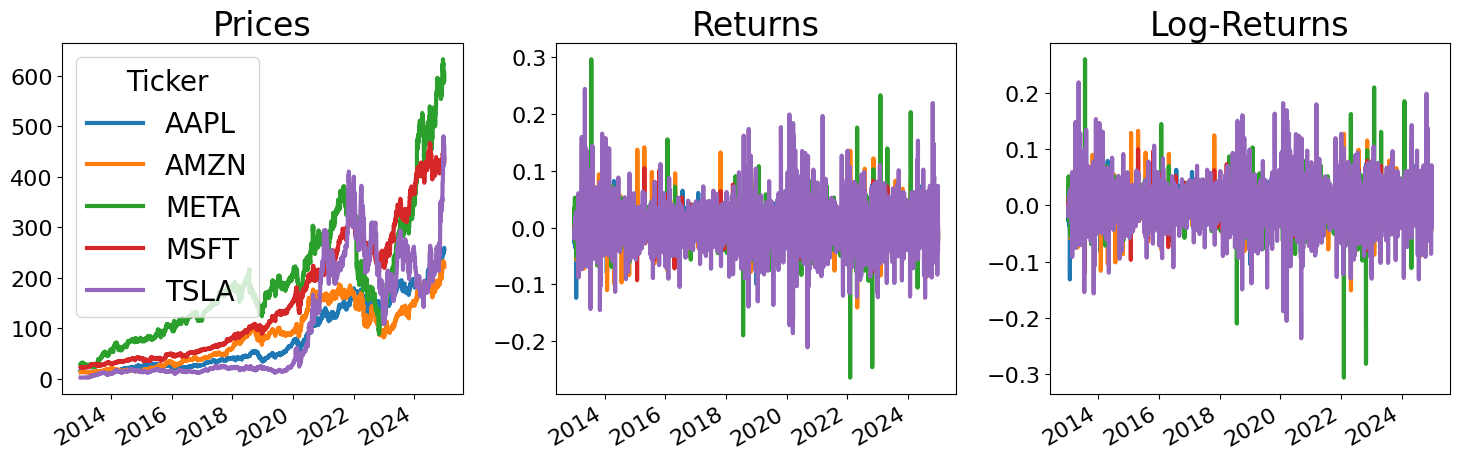

In [ ]:
# compute and plot the time series

df_returns = price_change(df_prices, kind="return")
df_log_returns = price_change(df_prices, kind="log_return")

fig, ax = plt.subplots(1,3, figsize=(15,5))
df_prices.plot(ax=ax[0], lw=3, xlabel="", title="Prices")
df_returns.plot(ax=ax[1], lw=3, xlabel="", title="Returns", legend=False)
df_log_returns.plot(ax=ax[2], lw=3, xlabel="", title="Log-Returns", legend=False)
fig.tight_layout()  # this ensures that the different panels don't overlap

From the time series, one can straightforwardly compute the probability distribution of the returns. To do so, we use the df.hist method, with the following parameters:
* bins: the number of divisions of the histogram.
* alpha = 0.8: this makes the histogram translucid (alpha=1 corresponds to an opaque histogram).
* density = True: this normalizes the histogram so that the total area is equal to one.
* label, legend, grid: these self-explanatory parameters control the visualization.

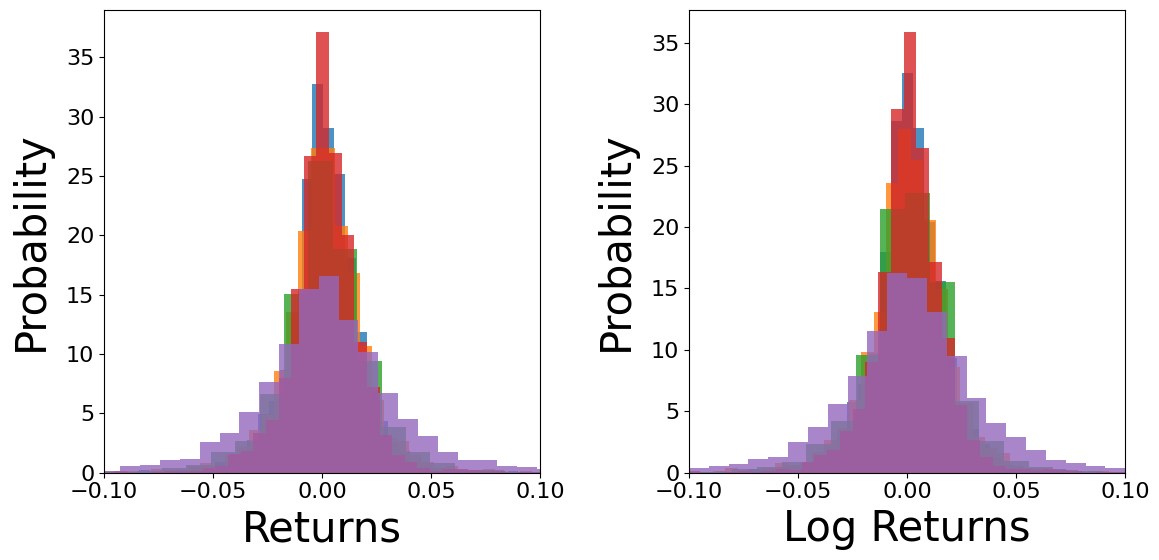

In [ ]:
#Plot histogram of returns
fig, ax = plt.subplots(1,2,figsize = (12,6))
for asset in df_prices.columns:
    df_returns[asset].hist(ax=ax[0], bins=50, alpha=0.8, density=True, label=asset, legend=False, grid=False)

ax[0].set_xlabel("Returns")
ax[0].set_ylabel("Probability", labelpad=10)
ax[0].set_xlim(-0.1, 0.1)

#Plot histogram of log_returns
for asset in df_prices.columns:
    df_log_returns[asset].hist(ax=ax[1], bins=50, alpha=0.8, density=True, label=asset, legend=False, grid=False)

ax[1].set_xlabel("Log Returns")
ax[1].set_ylabel("Probability", labelpad=10)
ax[1].set_xlim(-0.1, 0.1)
fig.tight_layout()


# Exercise 4: elementary financial analysis of stocks and indices

* Download the Adjusted Close price from 1st January 2000 to 31st December 2019 with daily resolution for the following stocks and indices (note: an index here means a measure of the performance of a specific group of financial assets, such as stocks):

 - S&P 500 (^GSPC): Top 500 US companies by market capitalization.
 - NASDAQ (^IXIC): Technology-heavy US stock market index.
 - IBEX 35 (^IBEX): Spain's top 35 publicly traded companies.
 - Dow Jones Industrial Average (^DJI): US index of 30 large companies.
 - NVIDIA (NVDA): Semiconductor and graphics processing company.
 - Ford Motor Company (F): American automobile manufacturer.
 - Intel (INTC): Leading semiconductor and microprocessor company.
 - Pfizer (PFE): Global pharmaceutical and biotechnology company.

**Note:** Use the prices in dollars except for the IBEX 35, which is in €. Don't worry about that, just go ahead.

* Plot the price time evolution and the return distribution (**use log returns**)

* Compute the mean, variance and Sharpe ratio for each asset and present it in a table.